# Runge-Kutta 4 without Small Angle Approximation

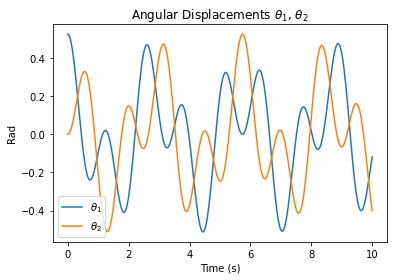

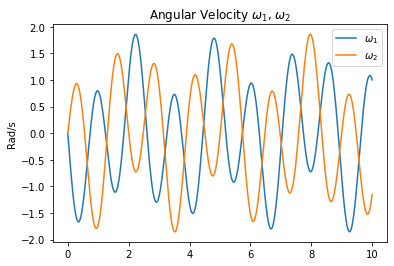

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

g = 9.8
L = [2, 2]
k = 10

def dot(*args): # args: [theta 1, theta 2, omega 1, omega 2]
    thetas = args[0:2]
    omegas = args[2:4]
    
    return np.array([
        omegas[0], # theta 1 dot
        omegas[1], # theta 2 dot
        -(g/L[0]) * np.sin(thetas[0]) - k * (np.sin(thetas[0]) - np.sin(thetas[1])), # omega 1 dot
        -(g/L[1]) * np.sin(thetas[1]) + k * (np.sin(thetas[0]) - np.sin(thetas[1])) # omega 2 dot
    ])

inic = [np.radians(30), np.radians(0), 0, 0] # theta 1, theta 2, omega 1, omega 2

phase = np.array(inic)
phases = []

dt = 0.001
t = np.arange(0, 10, dt)

for time in t:
    phases.append(phase) # append phase at start as arange already contains initial in time (0)

    K1 = dt * dot(*phase) # Euler iteration, returns (theta1_next, theta2_next, omega1_next, omega2_next)
    K2 = dt * dot(*(phase + K1/2))
    K3 = dt * dot(*(phase + K2/2))
    K4 = dt * dot(*(phase + K3))

    phase = phase + K1/6 + K2/3 + K3/3 + K4/6

thetas = [[elem[0] for elem in phases], [elem[1] for elem in phases]] # theta 1, theta 2
omegas = [[elem[2] for elem in phases], [elem[3] for elem in phases]]

plt.xlabel("Time (s)")

plt.plot(t, thetas[0], label=r"$\theta_1$")
plt.plot(t, thetas[1], label=r"$\theta_2$")
plt.title(r"Angular Displacements $\theta_1$, $\theta_2$")
plt.ylabel("Rad")
plt.legend()
plt.show()

plt.plot(t, omegas[0], label=r"$\omega_1$")
plt.plot(t, omegas[1], label=r"$\omega_2$")
plt.title(r"Angular Velocity $\omega_1$, $\omega_2$")
plt.ylabel("Rad/s")
plt.legend()
plt.show()

# Runge-Kutta 4 without SAA animated

In [1]:
# Spring generator from https://github.com/nrsyed/utilities/tree/master/spring
import math
import numpy

def spring_points(start, end, nodes, width):
    """!
    Return a list of points corresponding to a spring.
    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """

    # Check that nodes is at least 1.
    nodes = max(int(nodes), 1)

    # Convert to numpy array to account for inputs of different types/shapes.
    start, end = np.array(start).reshape((2,)), np.array(end).reshape((2,))

    # If both points are coincident, return the x and y coords of one of them.
    if (start == end).all():
        return start[0], start[1]

    # Calculate length of spring (distance between endpoints).
    length = np.linalg.norm(np.subtract(end, start))

    # Calculate unit vectors tangent (u_t) and normal (u_t) to spring.
    u_t = np.subtract(end, start) / length
    u_n = np.array([[0, -1], [1, 0]]).dot(u_t)

    # Initialize array of x (row 0) and y (row 1) coords of the nodes+2 points.
    spring_coords = np.zeros((2, nodes + 2))
    spring_coords[:,0], spring_coords[:,-1] = start, end

    # Check that length is not greater than the total length the spring
    # can extend (otherwise, math domain error will result), and compute the
    # normal distance from the centerline of the spring.
    normal_dist = math.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2

    # Compute the coordinates of each point (each node).
    for i in range(1, nodes + 1):
        spring_coords[:,i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    return spring_coords[0,:], spring_coords[1,:]

<IPython.core.display.Javascript object>


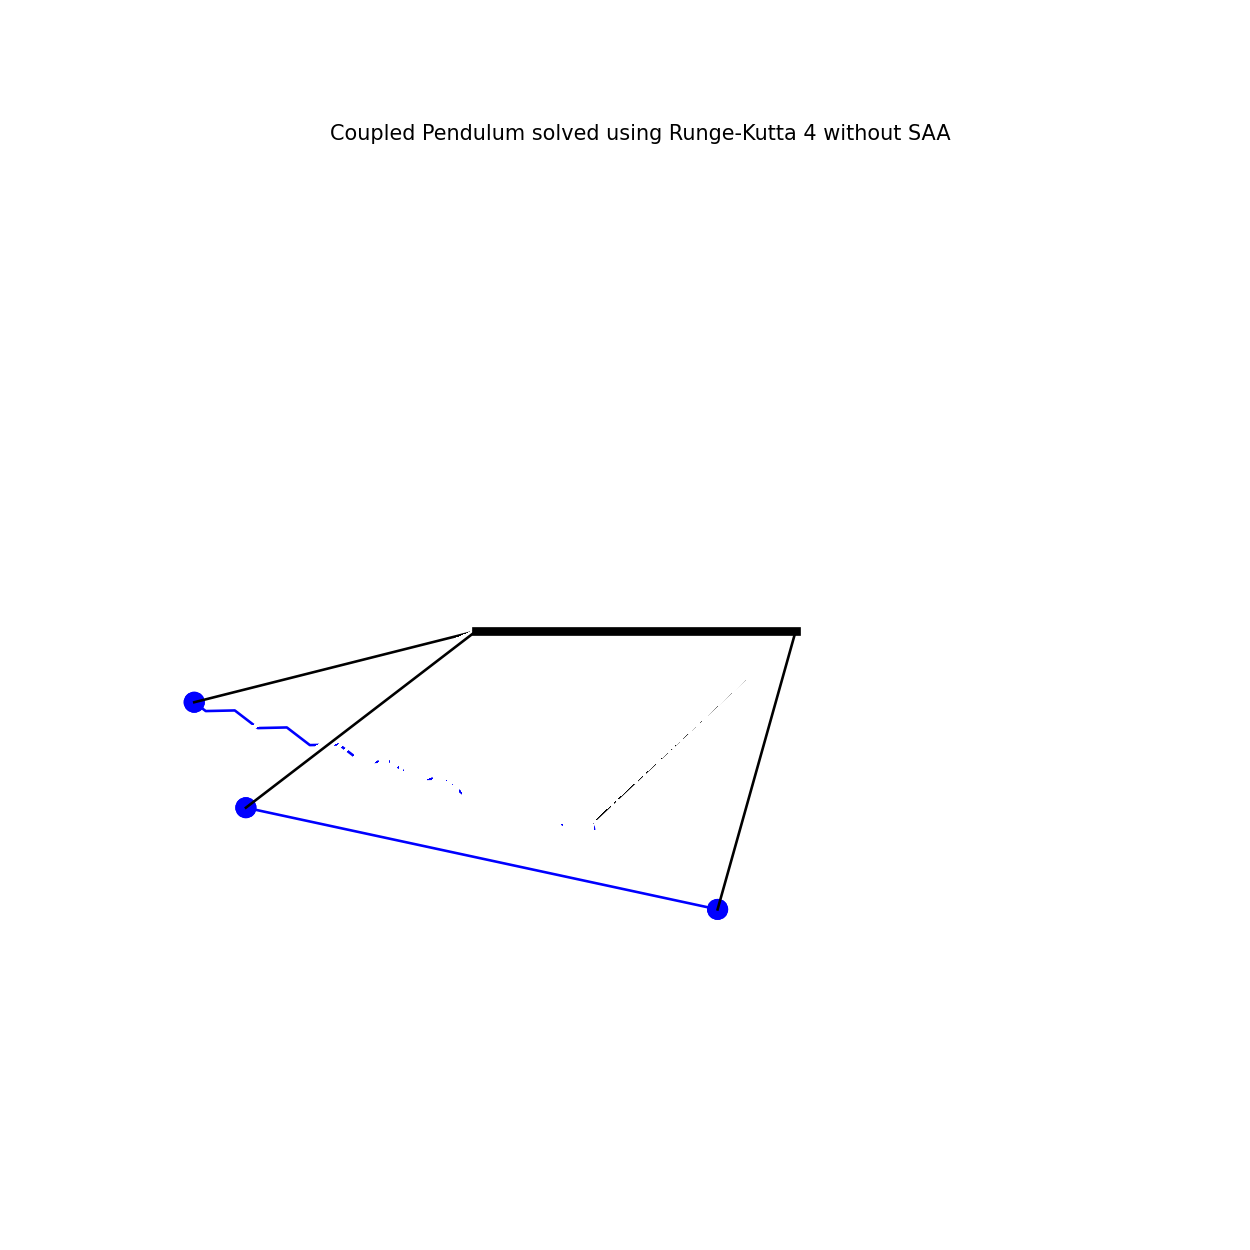

In [6]:
%matplotlib notebook

# Solving the Differential Equation
import numpy as np
import matplotlib.pyplot as plt

g = 9.8
L = np.array([0.3, 0.3])
k = 10

def dot(*args): # args: [theta 1, theta 2, omega 1, omega 2]
    thetas = args[0:2]
    omegas = args[2:4]
    
    return np.array([
        omegas[0], # theta 1 dot
        omegas[1], # theta 2 dot
        -(g/L[0]) * np.sin(thetas[0]) - k * (np.sin(thetas[0]) - np.sin(thetas[1])), # omega 1 dot
        -(g/L[1]) * np.sin(thetas[1]) + k * (np.sin(thetas[0]) - np.sin(thetas[1])) # omega 2 dot
    ])

inic = [np.radians(30), np.radians(0), 0, 0] # theta 1, theta 2, omega 1, omega 2

phase = np.array(inic)
phases = []

dt = 0.001
t = np.arange(0, 10, dt)

for time in t:
    phases.append(phase) # append phase at start as arange already contains initial in time (0)

    K1 = dt * dot(*phase) # Euler iteration, returns (theta1_next, theta2_next, omega1_next, omega2_next)
    K2 = dt * dot(*(phase + K1/2))
    K3 = dt * dot(*(phase + K2/2))
    K4 = dt * dot(*(phase + K3))
    
    phase = phase + K1/6 + K2/3 + K3/3 + K4/6

thetas = [[elem[0] for elem in phases], [elem[1] for elem in phases]] # theta 1, theta 2
omegas = [[elem[2] for elem in phases], [elem[3] for elem in phases]] # omega 1, omega 2

# Animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
fig.set_size_inches(10, 10)

pos = np.array([0.33, 1/2, 0.66, 1/2]).reshape(2, 2)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1))

plt.title("Coupled Pendulum solved using Runge-Kutta 4 without SAA")
plt.axis('off')

def get_line_coords(start, end):
    x = [coord[0] for coord in [start, end]]
    y = [coord[1] for coord in [start, end]]
    
    return x, y # [[x1, x2], [y1, y2]]

# [[x1, y1], [x2, y2]] + [[x1, y1], [x2, y2]]
def bob_positions(lengths, angles):
    x1, x2 = lengths * np.sin(angles)
    y1, y2 = -lengths * np.cos(angles)
    
    return pos + np.array([x1, y1, x2, y2]).reshape(2, 2)

bridge = ax.plot(*get_line_coords(*pos), color="black", linewidth=5)[0]
spring = ax.plot([], [], color="blue")[0]

lines = [ax.plot([], [], color="black")[0] for _ in range(2)]
bobs = [plt.Circle((0, 0), 0.01, color='b') for _ in range(2)]

patches = [*lines, *bobs, spring]

frames = 1000
step = len(thetas[0]) // frames
thetas_animate = [theta[::step] for theta in thetas]

interval = 1

def init():
    lines = patches[0:2]
    bobs = patches[2:4]
    spring = patches[4]
    
    for i in range(2):
        lines[i].set_data(*get_line_coords(pos[i], bob_positions(L, phases[0][0:2])[i]))

        bobs[i].center = bob_positions(L, phases[0][0:2])[i]
        ax.add_patch(bobs[i])
        
    # spring.set_data(*get_line_coords(*bob_positions(L, phases[0][0:2])))
    
    spring.set_data(*spring_points(*bob_positions(L, phases[0][0:2]), 15, 0.03))
    
    # ax.plot(*spring(point_a, point_b, 12, 1.2), c="black")
    
    return patches

def animate(frame):
    lines = patches[0:2]
    bobs = patches[2:4]
    spring = patches[4]
    
    angles = [theta[frame] for theta in thetas_animate]
    
    for i in range(2):
        lines[i].set_data(*get_line_coords(pos[i], bob_positions(L, angles)[i]))

        bobs[i].center = bob_positions(L, angles)[i]
        
    # spring.set_data(*get_line_coords(*bob_positions(L, angles)))
    
    spring.set_data(*spring_points(*bob_positions(L, angles), 15, 0.03))

    return patches

anim = FuncAnimation(fig, animate, init_func = init, interval = interval, frames = frames, blit=True)

In [4]:
# Display animation using JS

# from IPython.display import HTML
# HTML(anim.to_jshtml())

In [3]:
# Save animation

anim.save("coupled_pendulum_RK4_without_SAA.gif", fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.
